In [1]:
import os, glob
import pandas as pd
from collections import defaultdict
from pathlib import Path
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
from collections import defaultdict
from pathlib import Path
import pandas as pd

my_dir_path = "phish/"

results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "r") as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df_phish = pd.DataFrame(results)

In [4]:
df_phish['Phish'] = 1

In [5]:
len(df_phish)

503

In [7]:
my_dir_path = "legit/"

results = defaultdict(list)
for file in Path(my_dir_path).iterdir():
    with open(file, "r",encoding='Latin1') as file_open:
        results["file_name"].append(file.name)
        results["text"].append(file_open.read())
df_legit = pd.DataFrame(results)

In [8]:
df_legit['Phish'] = 0

In [9]:
len(df_legit)

4082

In [10]:
df = pd.concat([df_phish,df_legit])

In [11]:
df.reset_index(drop=True , inplace = True)
df["text"]= df["text"].astype(str)

In [12]:
df['text']

0       Return-Path: <user@domain>\nX-Original-To: use...
1       Return-Path: <user@domain>\nX-Original-To: use...
2       Return-Path: <user@domain>\nX-Original-To: use...
3       Return-Path: <user@domain>\nX-Original-To: use...
4       Return-Path: <user@domain>\nX-Original-To: use...
                              ...                        
4580    Received: from domain ([fe80::f85f:3b98:e405:6...
4581    Received: from domain.com (192.168.185.10) by ...
4582    From: Facebook <notification+user@domain>\nSub...
4583    Received: from domain.com (146.215.230.105) by...
4584    From: "Deadline.com" <user@domain>\nTo: "User"...
Name: text, Length: 4585, dtype: object

In [13]:
df['text'][1]

'Return-Path: <user@domain>\nX-Original-To: user@domain\nDelivered-To: user@domain\nReceived: from domain.com (domain.com [10.5.6.7])\n\tby domain.com (Postfix) with ESMTP id 75C06469D2\n\tfor <user@domain>; Mon, 31 Jul 2015 17:18:33 -0400 (EDT)\nReceived: from 213-157-171-118.domain.com.ro (unknown [213.157.171.118])\n\tby domain.com (Postfix) with SMTP id F00966CD12D\n\tfor <user@domain>; Mon, 31 Jul 2015 17:18:14 -0400 (EDT)\nReceived: from 22.32.167.34 by 213.157.171.118; Tue, 01 Aug 2015 03:12:15 +0500\nMessage-ID: <user@domain>\nFrom: "eBay Priority Protection" <user@domain>\nReply-To: "User" <user@domain>\nTo: user@domain\nSubject: Alert eBay Unpaid Item Strike Received\nDate: Mon, 31 Jul 2015 21:14:15 -0100\nX-Mailer: Microsoft Outlook IMO, Build 9.0.2416 (9.0.2910.0)\nMIME-Version: 1.0\nContent-Type: multipart/alternative;\n\tboundary="--7870540971199732"\nX-Priority: 3\nX-MSMail-Priority: Normal\nStatus: R\nX-Status: \nX-Keywords: \n\n\n\n\n<!--\nstyle2 {color: #0000CC}\n-->\

In [14]:
from email.parser import HeaderParser
parser = HeaderParser()
h = parser.parsestr(df['text'][1])

In [33]:
df

,file_name,text,Phish
0,1.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
1,10.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
2,100.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
3,101.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
4,102.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
...,...,...,...
4578,995.txt,Received: from domain (192.168.10.251) by doma...,0
4579,996.txt,Received: from domain ([fe80::f85f:3b98:e405:6...,0
4580,997.txt,Received: from domain.com (192.168.185.10) by ...,0
4581,998.txt,Received: from domain ([fe80::f85f:3b98:e405:6...,0


In [15]:
h.keys()

['Return-Path',
 'X-Original-To',
 'Delivered-To',
 'Received',
 'Received',
 'Received',
 'Message-ID',
 'From',
 'Reply-To',
 'To',
 'Subject',
 'Date',
 'X-Mailer',
 'MIME-Version',
 'Content-Type',
 'X-Priority',
 'X-MSMail-Priority',
 'Status',
 'X-Status',
 'X-Keywords']

In [16]:
h['Subject']

'Alert eBay Unpaid Item Strike Received'

In [17]:
import email
b = email.message_from_string(df['text'][10])
if b.is_multipart():
    for payload in b.get_payload():
        # if payload.is_multipart(): ...
        print( payload.get_payload())
else:
    print (b.get_payload())

Attention;=20
There've been an automatic security update on your email address. Click her=
e to complete update <<<link>>
=3DdExDOG1xYjNpcHQ2WWVhV2QyNVdkeVE6MQ>=20
Please note that you have withing 24 hours to complete this update. because=
 you might lose acess to your Email Box.
---------------------------------------------------------------------------=
-------------------------------------------------------------
The information contained in this communication may be confidential and is =
intended only for the
 use of the intended recipient(s).   If the reader of this message is not t=
he intended recipient(s),
 you are hereby notified that any dissemination, distribution, or copying o=
f this communication,
 or any of its contents, is strictly prohibited. If you have received this =
communication in error,
 please return it to the sender immediately and delete any copy of it from =
your computer system.



In [18]:
from email.parser import HeaderParser
df['Date'] = ' '  
df['From']= ''
df['Subject'] = ''
df['To'] = ''
df['body'] =''

import email
for i in range(0, len(df)):
    
    parser = HeaderParser()
    h = parser.parsestr(df['text'][i])
    df['From'][i] = h['From']
    df['To'][i] = h['to']
    df['Date'][i]= h['Date']
    df['Subject'][i]=h['Subject']
    b = email.message_from_string(df['text'][i])
    if b.is_multipart():
        for payload in b.get_payload():
            df['body'][i] = payload.get_payload()
    else:
        df['body'][i] = b.get_payload()
    
    

<ipython-input-18-ed628f97aa2e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['From'][i] = h['From']
<ipython-input-18-ed628f97aa2e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['To'][i] = h['to']
<ipython-input-18-ed628f97aa2e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'][i]= h['Date']
<ipython-input-18-ed628f97aa2e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [102]:
df

,file_name,text,Phish,Date,From,Subject,To,body
0,289.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Mon, 18 Jun 2015 03:02:34 +0100","""eBay""<user@domain>",Account On-hold: Please confirm your eBay info...,undisclosed-recipients:;,Message sent trough \n eBay S...
1,262.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Mon, 31 Jul 2015 21:14:15 -0100","""eBay Priority Protection"" <user@domain>",Alert eBay Unpaid Item Strike Received,user@domain,\n\n\n<!--\nstyle2 {color: #0000CC}\n-->\n\n ...
2,276.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Sun, 17 Jun 2015 10:41:44 -0500","""Jenn Crabtree"" <user@domain>",Aknowledge The Receipt Of the Mail,undisclosed-recipients:;,A Computer Database Maintainance is currently ...
3,29.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Wed, 12 Jul 2015 22:00:42 +0900","""E-gold""<user@domain>",Notification of limited account access,undisclosed-recipients:;,"We recently reviewed your e-gold account, and ..."
4,15.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Sat, 3 Mar 2015 22:15:17 +0800","""Simon John Rubias Dela Cruz"" <user@domain>",KEEPING TRACK OF YOUR USAGE.,undisclosed-recipients:;,Your web mail quota has exceeded the set quota...
...,...,...,...,...,...,...,...,...
4580,1738.txt,Received: from domain ([fe80::f85f:3b98:e405:6...,0,"Tue, 3 May 2015 08:45:53 -0700","""Walker, Eric"" <user@domain>",RE: New Comms template,"""User"" <user@domain>",Thanks Walter - need this by noon tomorrow so ...
4581,2231.txt,Received: from domain.com (192.168.185.10) by ...,0,"Wed, 4 May 2015 15:09:53 -0400",OrganizationPolling Update <user@domain>,=?utf-8?Q?LATEST_POLLS_=E2=86=92?=,User <user@domain>,"This November, we have the chance to take back..."
4582,2225.txt,From: Facebook <notification+user@domain>\nSub...,0,"Tue, 16 Sep 2015 00:50:19 +0000",Facebook <notification+user@domain>,David Diamond added a new photo to the album T...,"Pascal, Amy",David Diamond added a new photo to the album T...
4583,2543.txt,Received: from domain.com (146.215.230.105) by...,0,"Wed, 19 Feb 2015 18:07:35 -0500",Deadline.com <user@domain>,[domain.com] Oscars: '12 Years A Slave' Telli...,<user@domain>,<<link>> \n\n<<link>> \n\n Deadline Hol...


In [19]:
df_phish

,file_name,text,Phish
0,289.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
1,262.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
2,276.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
3,29.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
4,15.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
...,...,...,...
498,30.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
499,253.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
500,247.txt,Return-Path: <user@domain>\nX-Original-To: use...,1
501,290.txt,Return-Path: <user@domain>\nX-Original-To: use...,1


In [ ]:
# convert to caps (subject)
# convert to caps (body)
# (from) top words


# top frequent words from both legit and phising 
# word cloud on both of these

In [20]:
# capitalize the rows
df['Subject']=df['Subject'].apply(lambda x:str(x).upper())
df['body']=df['body'].apply(lambda x:str(x).upper())

In [41]:
df

,file_name,text,Phish,Date,From,Subject,To,body
0,1.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Fri, 28 Jan 2015 02:35:50 +0400","""PayPal"" <user@domain>",PAYPAL FLAGGED ACCOUNT,user@domain,"Dear PayPal Member,\n\nYour account has been r..."
1,10.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Wed, 30 Nov 2015 12:58:27 +0800",Sterling Keeley <user@domain>,UH SECURITY ALERT,undisclosed-recipients:;,UH Security Alert=2C\n\n=A0A DGTJTO virus has ...
2,100.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Sun, 17 May 2015 13:09:22 -0700",=?utf-8?Q?=C3=83=C2=82=C3=82=C2=A9__Customer_S...,RECENT CHANGES --VERIFY FOR UPGRADE.,undisclosed-recipients:;,Dear Customer this is to alert you of the rec...
3,101.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Mon, 18 Jun 2015 16:16:58 -0500","""PayPal""<user@domain>",ACCOUNT REVIEW DEPARTMENT,undisclosed-recipients:;,\n\n\nOnline Banking Profile Update Required.\...
4,102.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Mon, 17 Oct 2015 16:21:02 -0400","""Lavern Larsen"" <user@domain>",RE:WEBSIT,<user@domain>,HI ...
...,...,...,...,...,...,...,...,...
4578,995.txt,Received: from domain (192.168.10.251) by doma...,0,"Fri, 6 May 2015 22:19:54 +0000",OrganizationPress <user@domain>,DEMOCRATS HOLD TRUMP ACCOUNTABLE ACROSS THE CO...,OrganizationPress <user@domain>,To be automatically unsubscribed from this lis...
4579,996.txt,Received: from domain ([fe80::f85f:3b98:e405:6...,0,"Wed, 27 Apr 2015 08:57:37 -0700","""Moore, Colby"" <user@domain>","DAILY POLITICAL GUIDANCE -- WEDNESDAY, APRIL 27",None,This email is intended to provide a brief summ...
4580,997.txt,Received: from domain.com (192.168.185.10) by ...,0,"Mon, 2 May 2015 14:14:54 +0000","""xxGuthrie, Savannah (NBCUniversal)"" <user@dom...",RE: ORGANIZATIONCHAIR NEXT TUESDAY?,"""User"" <user@domain>",Will get right back\nJust pinged our EP\n\nSav...
4581,998.txt,Received: from domain ([fe80::f85f:3b98:e405:6...,0,"Sat, 7 May 2015 12:33:35 -0700","""Jefferson, Deshundra"" <user@domain>",RE: DWS ARIZONA REPUBLIC OP-ED IS NOW UP,"""User"" <user@domain>",I'll call you Pablo to walk you through\n\nSen...


In [21]:
df_Phish=df[df['Phish']==1]

In [22]:
df_Legit=df[df['Phish']==0]

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sharanbasavasumbad/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
stop_words.add('Â'.lower())

In [35]:
import nltk
nltk.download('punkt')
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sharanbasavasumbad/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
#function to clean text corpus (remove stop words and punctions)
def clean_func(df,column_name):
    word_count=[words for words in df[column_name]]
    all_words=' '.join([i for i in word_count]).split()
    filtered_txt = [word for word in all_words if not word.lower() in stop_words] #stop word removal
    new_words= [word for word in filtered_txt if word.isalnum()] #remove the punctuations
    return (new_words)

In [45]:
df_Whole_Body_cleaned=clean_func(df,'body')
df_Whole_Subject_cleaned=clean_func(df,'Subject')

In [46]:
df_Whole_Body_cleaned

['MESSAGE',
 'SENT',
 'TROUGH',
 'EBAY',
 'SYSTEM',
 'REGISTERED',
 'NAME',
 'INCLUDED',
 'SHOW',
 'MESSAGE',
 'ORIGINATED',
 'LEARN',
 'ACCOUNT',
 'PLEASE',
 'CONFIRM',
 'EBAY',
 'INFORMATIONS',
 'TODAY',
 'STYLE2',
 'ALERT',
 'EBAY',
 'UNPAID',
 'ITEM',
 'STRIKE',
 'DEAR',
 'EBAY',
 'MEMBER',
 'RECEIVED',
 'UNPAID',
 'STRIKE',
 'WINNING',
 'BUYER',
 'EBAY',
 'ITEM',
 'LOVE',
 'SMART',
 'PHIL',
 'MCGRAW',
 'INFORMED',
 'EBAY',
 'ITEM',
 'STILL',
 'TWO',
 'ABLE',
 'COME',
 'RECEIVED',
 'UNPAID',
 'ITEM',
 'LOST',
 'FEEDBACK',
 'WOULD',
 'LIKE',
 'ADDITIONAL',
 'INFORMATION',
 'REGARDING',
 'ITEM',
 'PLEASE',
 'REVIEW',
 'DISPUTE',
 'DETAILS',
 'REPEATED',
 'UNPAID',
 'ITEM',
 'STRIKES',
 'MAY',
 'RESULT',
 'SUSPENSION',
 'APPEAL',
 'UNPAID',
 'ITEM',
 'KE',
 'BELIEVE',
 'READ',
 'REQUIREMENTS',
 'MEET',
 'APPEAL',
 'APPEAL',
 'SUCCESSFUL',
 'STRIKE',
 'RECENTLY',
 'PAID',
 'ITEM',
 'OTHERWISE',
 'RESOLVED',
 'ASK',
 'SELLER',
 'REMOVE',
 'UNPAID',
 'ITEM',
 'INFORMED',
 'US',
 'YET',
 

In [38]:
df_Phish_Body_cleaned=clean_func(df_Phish,'body')
df_Legit_Body_cleaned=clean_func(df_Legit,'body')

In [39]:
df_Phish_Subject_cleaned=clean_func(df_Phish,'Subject')
df_Legit_Subject_cleaned=clean_func(df_Legit,'Subject')

In [247]:
#function to get top fifty words
def top_fifty_func(df_Phish_Body_cleaned):
    fdist = FreqDist(df_Phish_Body_cleaned)
    top_fifty = fdist.most_common(50)
    return (top_fifty)

In [278]:
#top fifty in whole body corpus
top_fifty_Whole_Body=top_fifty_func(df_Whole_Body_cleaned)
top_fifty_Whole_Body

[('TRUMP', 6396),
 ('2015', 6062),
 ('MAY', 3871),
 ('WOULD', 3065),
 ('PLEASE', 2905),
 ('NEW', 2785),
 ('PM', 2514),
 ('SAID', 2464),
 ('DONALD', 2456),
 ('EMAIL', 2316),
 ('SENT', 2238),
 ('REPUBLICAN', 2120),
 ('ACCOUNT', 2105),
 ('EMAD', 2015),
 ('ORGANIZATION', 1949),
 ('LIKE', 1944),
 ('STATE', 1932),
 ('DEMOCRATIC', 1883),
 ('SHEHATA', 1841),
 ('PEOPLE', 1779),
 ('US', 1756),
 ('NATIONAL', 1748),
 ('PARTY', 1658),
 ('ONE', 1649),
 ('MESFER', 1618),
 ('CAMPAIGN', 1555),
 ('PRESIDENT', 1413),
 ('VOTE', 1335),
 ('ALSO', 1327),
 ('GOING', 1327),
 ('GET', 1321),
 ('TAX', 1298),
 ('BEST', 1288),
 ('KNOW', 1284),
 ('CLINTON', 1259),
 ('AL', 1258),
 ('GOP', 1251),
 ('MAKE', 1248),
 ('CALL', 1216),
 ('DEAR', 1211),
 ('WASHINGTON', 1204),
 ('LAST', 1175),
 ('SANDERS', 1166),
 ('NEED', 1158),
 ('WANT', 1153),
 ('APRIL', 1138),
 ('DIRECTOR', 1128),
 ('PRESIDENTIAL', 1127),
 ('TIME', 1099),
 ('MANAGER', 1088)]

In [250]:
#top fifty in Phishing body corpus
top_fifty_Phish_Body=top_fifty_func(df_Phish_Body_cleaned)
top_fifty_Phish_Body

[('ACCOUNT', 1290),
 ('EBAY', 833),
 ('PAYPAL', 703),
 ('PLEASE', 660),
 ('INFORMATION', 472),
 ('EMAIL', 403),
 ('2015', 400),
 ('CLICK', 327),
 ('ACCESS', 322),
 ('THANK', 307),
 ('SENT', 291),
 ('SECURITY', 285),
 ('UPDATE', 285),
 ('MAY', 282),
 ('MESSAGE', 268),
 ('LINK', 263),
 ('ONLINE', 261),
 ('DEAR', 252),
 ('ITEM', 251),
 ('BANK', 250),
 ('PROTECT', 207),
 ('USER', 203),
 ('MEMBER', 196),
 ('ID', 192),
 ('VERIFY', 184),
 ('BANKING', 178),
 ('RIGHTS', 173),
 ('TRADEMARKS', 172),
 ('LOG', 170),
 ('HELP', 168),
 ('RECEIVE', 165),
 ('USING', 161),
 ('MAIL', 161),
 ('US', 160),
 ('ENSURE', 155),
 ('PRIVACY', 155),
 ('CUSTOMER', 138),
 ('SERVICE', 138),
 ('COMPLETE', 137),
 ('REGISTERED', 135),
 ('SYSTEM', 133),
 ('COPYRIGHT', 133),
 ('RESPOND', 132),
 ('REPLY', 130),
 ('NEW', 129),
 ('PASSWORD', 125),
 ('ORDER', 122),
 ('ADDRESS', 121),
 ('LEARN', 118),
 ('USE', 117)]

In [252]:
#top fifty in Legit body corpus
top_fifty_Legit_Body=top_fifty_func(df_Legit_Body_cleaned)
top_fifty_Legit_Body

[('TRUMP', 6396),
 ('2015', 5662),
 ('MAY', 3589),
 ('WOULD', 2980),
 ('NEW', 2656),
 ('PM', 2511),
 ('DONALD', 2456),
 ('SAID', 2455),
 ('PLEASE', 2245),
 ('REPUBLICAN', 2120),
 ('EMAD', 2015),
 ('SENT', 1947),
 ('STATE', 1927),
 ('ORGANIZATION', 1922),
 ('EMAIL', 1913),
 ('DEMOCRATIC', 1883),
 ('LIKE', 1850),
 ('SHEHATA', 1841),
 ('PEOPLE', 1774),
 ('NATIONAL', 1690),
 ('PARTY', 1637),
 ('MESFER', 1618),
 ('US', 1596),
 ('ONE', 1575),
 ('CAMPAIGN', 1555),
 ('PRESIDENT', 1408),
 ('VOTE', 1335),
 ('GOING', 1325),
 ('ALSO', 1282),
 ('TAX', 1265),
 ('GET', 1262),
 ('CLINTON', 1259),
 ('AL', 1258),
 ('BEST', 1257),
 ('KNOW', 1256),
 ('GOP', 1251),
 ('CALL', 1196),
 ('WASHINGTON', 1184),
 ('MAKE', 1180),
 ('SANDERS', 1166),
 ('LAST', 1151),
 ('APRIL', 1129),
 ('DIRECTOR', 1127),
 ('PRESIDENTIAL', 1127),
 ('WANT', 1123),
 ('MANAGER', 1084),
 ('NEED', 1072),
 ('CRUZ', 1046),
 ('TIME', 1045),
 ('THINK', 1044)]

In [253]:
#top fifty in Phish subject corpus
top_fifty_Phish_Subject=top_fifty_func(df_Phish_Subject_cleaned)
top_fifty_Phish_Subject

[('ACCOUNT', 148),
 ('PAYPAL', 63),
 ('EBAY', 56),
 ('SECURITY', 54),
 ('NOTIFICATION', 40),
 ('UPDATE', 36),
 ('ITEM', 34),
 ('BANK', 28),
 ('ONLINE', 28),
 ('MEASURES', 27),
 ('PLEASE', 27),
 ('ACCESS', 25),
 ('QUESTION', 25),
 ('MEMBER', 22),
 ('MESSAGE', 21),
 ('REQUIRED', 21),
 ('LIMITED', 19),
 ('BANKING', 18),
 ('INFORMATION', 18),
 ('NEW', 16),
 ('CONFIRM', 16),
 ('ALERT', 14),
 ('IMPORTANT', 14),
 ('URGENT', 14),
 ('NOTICE', 13),
 ('BILLING', 13),
 ('VERIFY', 12),
 ('EMAIL', 12),
 ('UNPAID', 12),
 ('RESPOND', 12),
 ('CUSTOMER', 11),
 ('SERVICE', 11),
 ('USER', 11),
 ('FLAGGED', 10),
 ('DEPARTMENT', 10),
 ('DEAR', 10),
 ('CHASE', 10),
 ('RESPONSE', 10),
 ('PROFILE', 10),
 ('RESTORE', 9),
 ('WEBMAIL', 9),
 ('UNAUTHORIZED', 9),
 ('AMERICA', 8),
 ('CARD', 8),
 ('SUSPENSION', 7),
 ('MAILBOX', 7),
 ('CONFIRMATION', 7),
 ('UPGRADE', 7),
 ('DISPUTE', 7),
 ('VERIFICATION', 7)]

In [255]:
#top fifty in Legit subject corpus
top_fifty_Legit_Subject=top_fifty_func(df_Legit_Subject_cleaned)
top_fifty_Legit_Subject

[('VIDEO', 250),
 ('NEW', 231),
 ('TRUMP', 221),
 ('CALL', 132),
 ('EVENT', 129),
 ('UPDATED', 121),
 ('DWS', 115),
 ('PHOTO', 111),
 ('CALLS', 110),
 ('CALENDAR', 110),
 ('STATEMENT', 81),
 ('ADDED', 77),
 ('ALBUM', 77),
 ('CNN', 72),
 ('DAVID', 71),
 ('FOX', 63),
 ('2015', 62),
 ('REQUEST', 62),
 ('TOMORROW', 61),
 ('MILAN', 60),
 ('DIAMOND', 57),
 ('MAY', 56),
 ('DANIELE', 56),
 ('DRAFT', 55),
 ('PRESS', 54),
 ('TODAY', 51),
 ('DONALD', 51),
 ('CRUZ', 50),
 ('WEEK', 48),
 ('USD', 46),
 ('CAMPAIGN', 46),
 ('TIME', 45),
 ('TV', 45),
 ('BEST', 44),
 ('DAILY', 44),
 ('SCARAFILE', 43),
 ('NEWS', 43),
 ('E', 43),
 ('COMMS', 42),
 ('ALESSANDRO', 42),
 ('INTERVIEW', 42),
 ('DAY', 42),
 ('MEETING', 41),
 ('GOP', 41),
 ('YEARS', 40),
 ('MOBILE', 38),
 ('SANDERS', 37),
 ('REPORT', 37),
 ('UPLOADS', 37),
 ('FILM', 37)]

In [256]:
df.describe()

,Phish
count,4583.000000
mean,0.109317
std,0.312071
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [257]:
!pip install wordcloud

<Figure size 432x288 with 0 Axes>

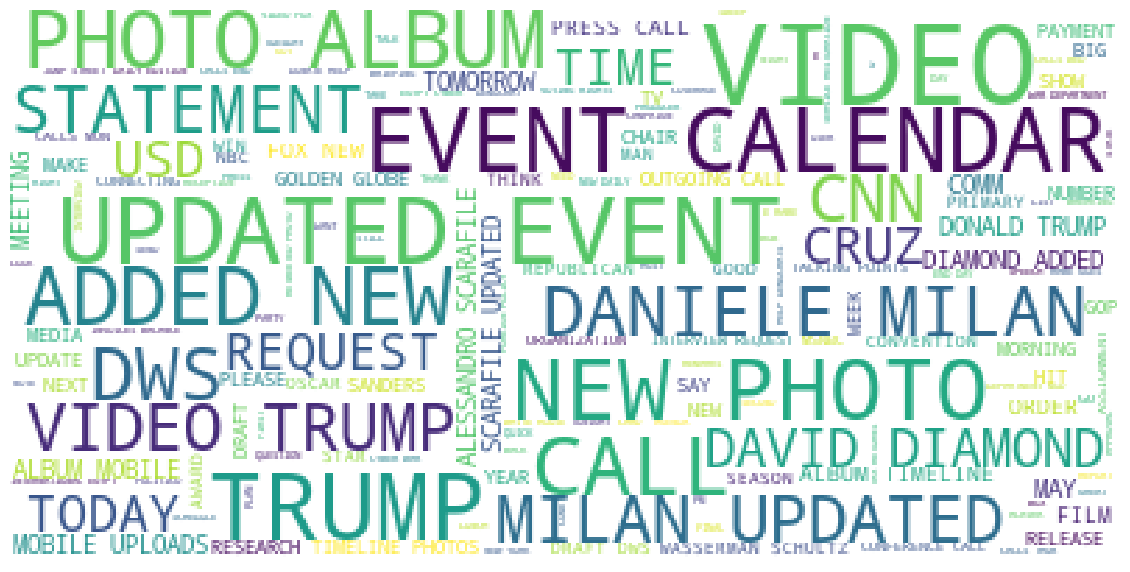

In [258]:
#word cloud for Legit Subject
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
import wordcloud
from wordcloud import WordCloud, STOPWORDS

legit_subject=' '.join([i for i in df_Legit_Subject_cleaned])

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=1000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(legit_subject)) #df['Subject'][1]

print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1000)

<Figure size 432x288 with 0 Axes>

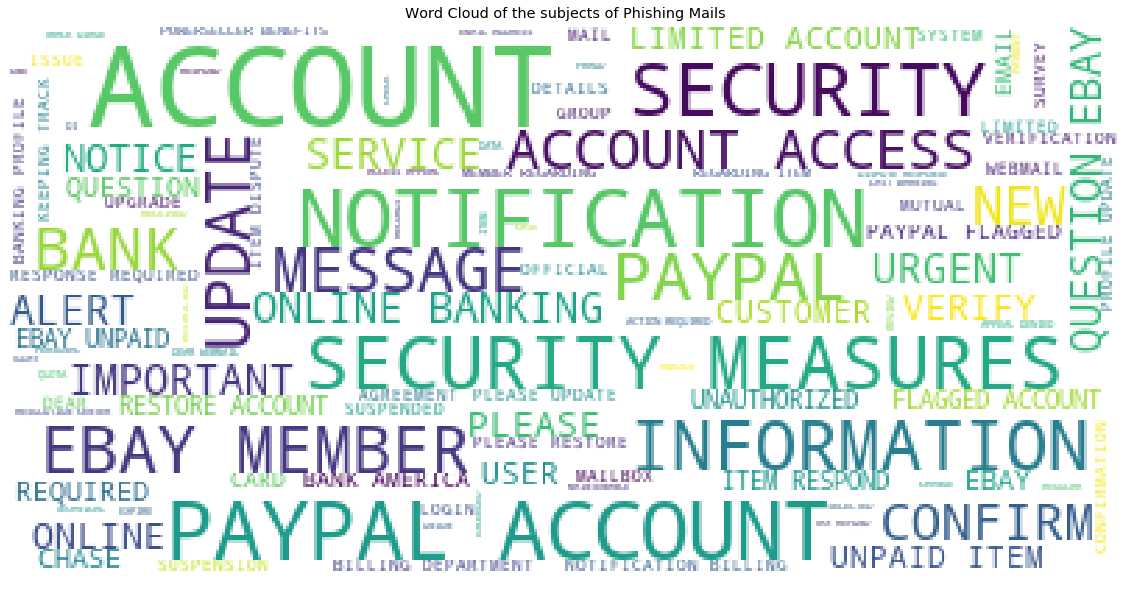

In [266]:
#word cloud for Phishing Subject
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
import wordcloud
from wordcloud import WordCloud, STOPWORDS

Phish_subject=' '.join([i for i in df_Phish_Subject_cleaned])

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=1000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 



wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(Phish_subject))

print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of the subjects of Phishing Mails')
plt.show()
fig.savefig("word1.png", dpi=1000)

<Figure size 432x288 with 0 Axes>

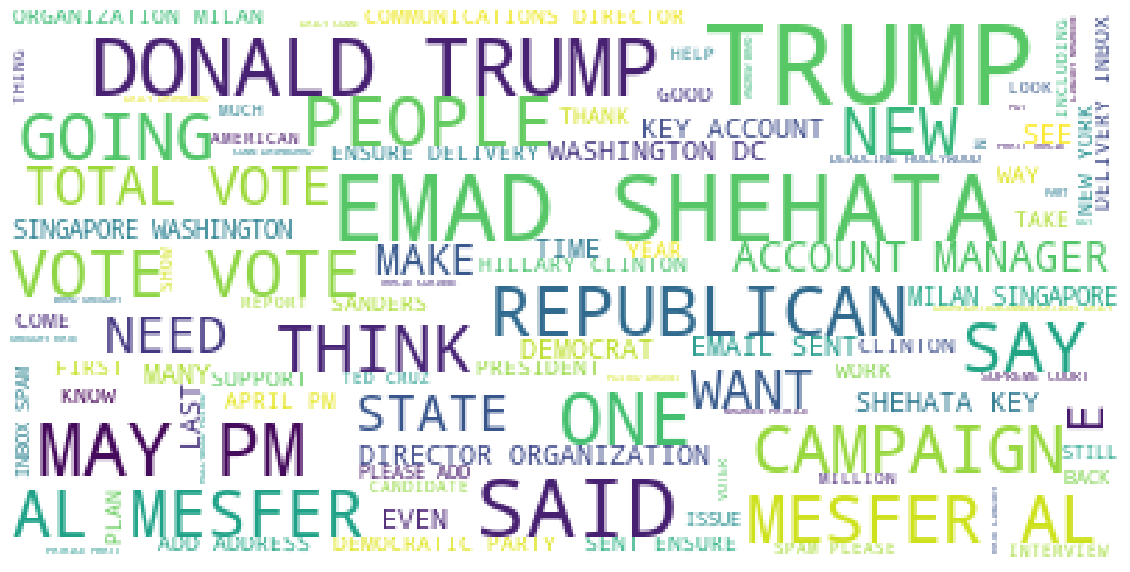

In [260]:
#word cloud for Legit Body
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
import wordcloud
from wordcloud import WordCloud, STOPWORDS

legit_body=' '.join([i for i in df_Legit_Body_cleaned])

#word_count=[words for words in df['Subject']]
#all_words=' '.join([i for i in word_count]).split()

#mpl.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=1000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


#stopwords = set(STOPWORDS)
#data = pd.read_csv("../input/most_backed.csv")

wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(legit_body)) #df['Subject'][1]

print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1000)

<Figure size 432x288 with 0 Axes>

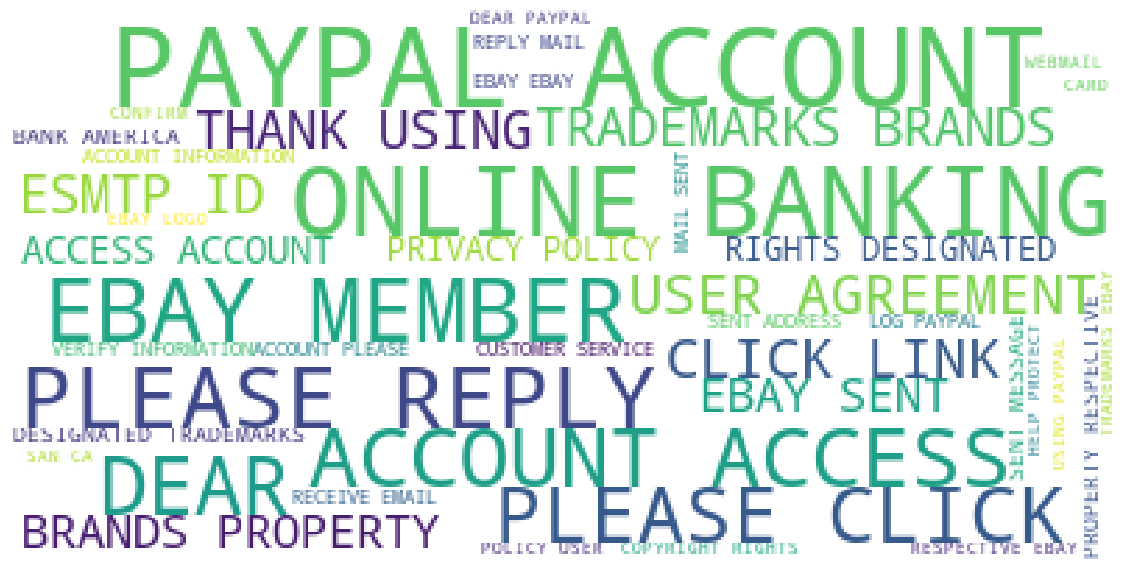

In [261]:
#word cloud for Phishing Body
import numpy as np # linear algebra
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
import wordcloud
from wordcloud import WordCloud, STOPWORDS

Phish_body=' '.join([i for i in df_Phish_Body_cleaned])

mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=1000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


wordcloud = WordCloud(
                          background_color='white',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(Phish_body))

print(wordcloud)
fig = plt.figure(1)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1000)

In [262]:
df.head()

,file_name,text,Phish,Date,From,Subject,To,body
0,1.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Fri, 28 Jan 2015 02:35:50 +0400","""PayPal"" <user@domain>",PAYPAL FLAGGED ACCOUNT,user@domain,"DEAR PAYPAL MEMBER,\n\nYOUR ACCOUNT HAS BEEN R..."
1,10.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Wed, 30 Nov 2015 12:58:27 +0800",Sterling Keeley <user@domain>,UH SECURITY ALERT,undisclosed-recipients:;,UH SECURITY ALERT=2C\n\n=A0A DGTJTO VIRUS HAS ...
2,100.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Sun, 17 May 2015 13:09:22 -0700",=?utf-8?Q?=C3=83=C2=82=C3=82=C2=A9__Customer_S...,RECENT CHANGES --VERIFY FOR UPGRADE.,undisclosed-recipients:;,DEAR CUSTOMER THIS IS TO ALERT YOU OF THE REC...
3,101.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Mon, 18 Jun 2015 16:16:58 -0500","""PayPal""<user@domain>",ACCOUNT REVIEW DEPARTMENT,undisclosed-recipients:;,\n\n\nONLINE BANKING PROFILE UPDATE REQUIRED.\...
4,102.txt,Return-Path: <user@domain>\nX-Original-To: use...,1,"Mon, 17 Oct 2015 16:21:02 -0400","""Lavern Larsen"" <user@domain>",RE:WEBSIT,<user@domain>,HI ...


Text(0, 0.5, 'Frequency')

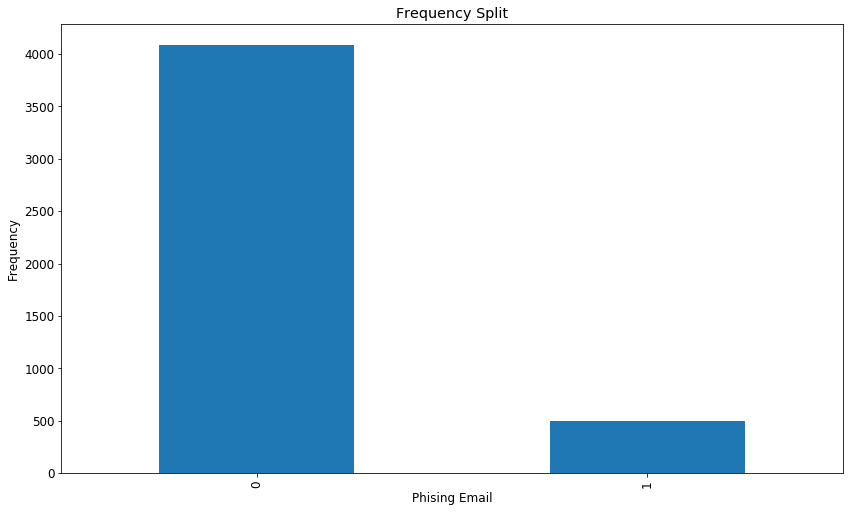

In [267]:
#Count seperation
ax = df['Phish'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency Split")
ax.set_xlabel("Phising Email")
ax.set_ylabel("Frequency")

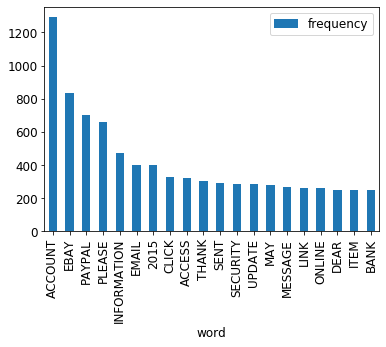

In [264]:
#top fifty Phish Body
df_Phish_body = pd.DataFrame(top_fifty_Phish_Body[:20], columns=['word', 'frequency'])
df_Phish_body.plot(kind='bar', x='word')

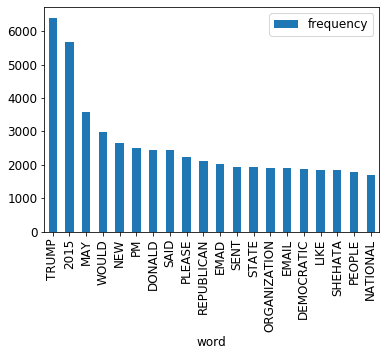

In [265]:
#top fifty Legit Body
df_Phish_body = pd.DataFrame(top_fifty_Legit_Body[:20], columns=['word', 'frequency'])
df_Phish_body.plot(kind='bar', x='word')

Text(0.5, 1.0, 'Top 20 frequent words in the subject of Phishing Emails')

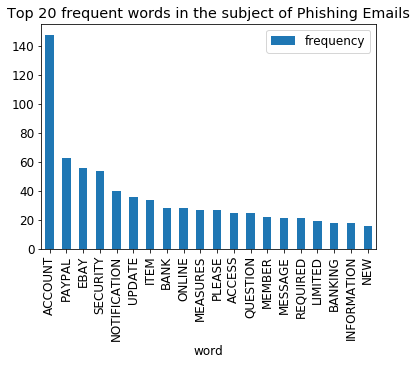

In [272]:
#top fifty Phish Subject
df_Phish_body = pd.DataFrame(top_fifty_Phish_Subject[:20], columns=['word', 'frequency'])
df_Phish_body.plot(kind='bar', x='word')
plt.title('Top 20 frequent words in the subject of Phishing Emails')

Text(0.5, 1.0, 'Top 20 frequent words in the subject of Legit Emails')

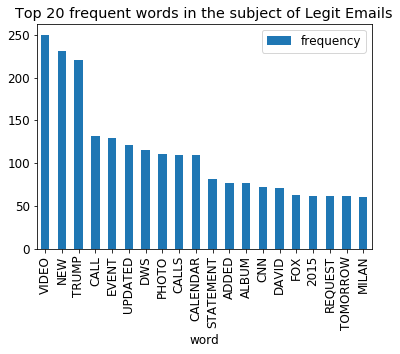

In [ ]:
#top fifty Phish Body
df_Phish_body = pd.DataFrame(top_fifty_Legit_Subject[:20], columns=['word', 'frequency'])
df_Phish_body.plot(kind='bar', x='word')
plt.title('Top 20 frequent words in the subject of Legit Emails')

In [ ]:
#all df on body

Text(0.5, 1.0, 'Top 20 frequent words in the body of All Emails')

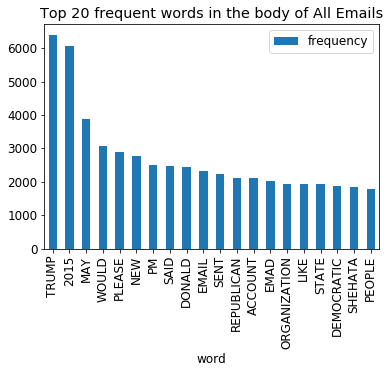

In [279]:
#top_fifty_Phish_Body
df_Phish_body = pd.DataFrame(top_fifty_Whole_Body[:20], columns=['word', 'frequency'])
df_Phish_body.plot(kind='bar', x='word')
plt.title('Top 20 frequent words in the body of All Emails')

In [43]:
len(df_Phish_Body_cleaned)


39787

In [47]:
!jupyter-nbconvert --to PDFviaHTML Phishing_data_Analysis.ipynb

[NbConvertApp] Converting notebook Phishing_data_Analysis.ipynb to PDFviaHTML
[NbConvertApp] Writing 1415285 bytes to Phishing_data_Analysis.pdf
